<a href="https://cognitiveclass.ai/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0101ENSkillsNetwork945-2022-01-01"><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork/images/IDSN-logo.png" width="400"> </a>

<h1 align=center><font size = 5>Regression Models with Keras</font></h1>


## Introduction


As we discussed in the videos, despite the popularity of more powerful libraries such as PyToch and TensorFlow, they are not easy to use and have a steep learning curve. So, for people who are just starting to learn deep learning, there is no better library to use other than the Keras library. 

Keras is a high-level API for building deep learning models. It has gained favor for its ease of use and syntactic simplicity facilitating fast development. As you will see in this lab and the other labs in this course, building a very complex deep learning network can be achieved with Keras with only few lines of code. You will appreciate Keras even more, once you learn how to build deep models using PyTorch and TensorFlow in the other courses.

So, in this lab, you will learn how to use the Keras library to build a regression model.


<h2>Regression Models with Keras</h2>

<h3>Objective for this Notebook<h3>    
<h5> 1. How to use the Keras library to build a regression model.</h5>
<h5> 2. Download and Clean dataset </h5>
<h5> 3. Build a Neural Network </h5>
<h5> 4. Train and Test the Network. </h5>     



## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Download and Clean Dataset</a>  
2. <a href="#item32">Import Keras</a>  
3. <a href="#item33">Build a Neural Network</a>  
4. <a href="#item34">Train and Test the Network</a>  

</font>
</div>


<a id="item31"></a>


## Download and Clean Dataset


Let's start by importing the <em>pandas</em> and the Numpy libraries.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented. 
# If you run this notebook on a different environment, e.g. your desktop, you may need to uncomment and install certain libraries.

#!pip install numpy==1.21.4
#!pip install pandas==1.3.4
#!pip install keras==2.1.6

In [2]:
import pandas as pd
import numpy as np

We will be playing around with the same dataset that we used in the videos.

<strong>The dataset is about the compressive strength of different samples of concrete based on the volumes of the different ingredients that were used to make them. Ingredients include:</strong>

<strong>1. Cement</strong>

<strong>2. Blast Furnace Slag</strong>

<strong>3. Fly Ash</strong>

<strong>4. Water</strong>

<strong>5. Superplasticizer</strong>

<strong>6. Coarse Aggregate</strong>

<strong>7. Fine Aggregate</strong>


Let's download the data and read it into a <em>pandas</em> dataframe.


In [3]:
concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


So the first concrete sample has 540 cubic meter of cement, 0 cubic meter of blast furnace slag, 0 cubic meter of fly ash, 162 cubic meter of water, 2.5 cubic meter of superplaticizer, 1040 cubic meter of coarse aggregate, 676 cubic meter of fine aggregate. Such a concrete mix which is 28 days old, has a compressive strength of 79.99 MPa. 


#### Let's check how many data points we have.


In [4]:
concrete_data.shape

(1030, 9)

So, there are approximately 1000 samples to train our model on. Because of the few samples, we have to be careful not to overfit the training data.


Let's check the dataset for any missing values.


In [51]:
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

The data looks very clean and is ready to be used to build our model.


#### Split data into predictors and target


The target variable in this problem is the concrete sample strength. Therefore, our predictors will be all the other columns.


In [6]:
concrete_data_columns = concrete_data.columns
print(concrete_data_columns)
predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
target = concrete_data['Strength'] # Strength column

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')


<a id="item2"></a>


Let's do a quick sanity check of the predictors and the target dataframes.


In [7]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [8]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

Finally, the last step is to normalize the data by substracting the mean and dividing by the standard deviation.


In [9]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


Let's save the number of predictors to *n_cols* since we will need this number when building our network.


In [10]:
n_cols = predictors_norm.shape[1] # number of predictors
n_cols

8

<a id="item1"></a>


<a id='item32'></a>


## Import Keras


Recall from the videos that Keras normally runs on top of a low-level library such as TensorFlow. This means that to be able to use the Keras library, you will have to install TensorFlow first and when you import the Keras library, it will be explicitly displayed what backend was used to install the Keras library. In CC Labs, we used TensorFlow as the backend to install Keras, so it should clearly print that when we import Keras.


#### Let's go ahead and import the Keras library


In [11]:
import keras

Using TensorFlow backend.
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jupyterlab/con

As you can see, the TensorFlow backend was used to install the Keras library.


Let's import the rest of the packages from the Keras library that we will need to build our regressoin model.


In [12]:
from keras.models import Sequential
from keras.layers import Dense

<a id='item33'></a>


## Build a Neural Network


Let's define a function that defines our regression model for us so that we can conveniently call it to create our model.


In [27]:
Part B: One hidden layer of 10 units, but with normalization and 50 epochs

In [45]:
# # define regression model
# def regression_model():
#     # create model
#     model = Sequential()
#     model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
#     model.add(Dense(1))
    
#     # compile model
#     model.compile(optimizer='adam', loss='mean_squared_error')
#     return model

In [18]:
# def reg_sgd():
#     model = Sequential()
#     model.add(Dense(50, activation = 'relu', input_shape=(n_cols,)))
#     model.add(Dense(50, activation = 'relu',))
#     model.add(Dense(1))
    
#     model.compile(optimizer='sgd', loss = 'mean_squared_error')
#     return model

<a id="item4"></a>


<a id='item34'></a>


## Train and Test the Network


Let's call the function now to create our model.


In [13]:
# import train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


Next, we will train and test the model at the same time using the *fit* method. We will leave out 30% of the data for validation and we will train the model for 100 epochs.


In [ ]:
# fit the model
mse = []
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3)
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1))
for i in range(50):
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, validation_split=0.3, epochs=50, verbose=2)
    y_pred = model.predict(X_test)
    mse.append(mean_squared_error(y_test,y_pred))
    print('LOOP ', i+1, ' Completed\n')
print(mse)

Train on 504 samples, validate on 217 samples
Epoch 1/50
 - 0s - loss: 183180.5637 - val_loss: 130556.4444
Epoch 2/50
 - 0s - loss: 97143.1886 - val_loss: 61558.8485
Epoch 3/50
 - 0s - loss: 41633.5465 - val_loss: 22160.5830
Epoch 4/50
 - 0s - loss: 14011.4094 - val_loss: 7092.8564
Epoch 5/50
 - 0s - loss: 4948.8012 - val_loss: 3992.4640
Epoch 6/50
 - 0s - loss: 3305.1047 - val_loss: 3852.4540
Epoch 7/50
 - 0s - loss: 3236.3207 - val_loss: 3806.5908
Epoch 8/50
 - 0s - loss: 3138.9142 - val_loss: 3673.7985
Epoch 9/50
 - 0s - loss: 3058.6289 - val_loss: 3563.4020
Epoch 10/50
 - 0s - loss: 2973.7837 - val_loss: 3483.1891
Epoch 11/50
 - 0s - loss: 2902.8380 - val_loss: 3398.2715
Epoch 12/50
 - 0s - loss: 2825.8641 - val_loss: 3316.5862
Epoch 13/50
 - 0s - loss: 2756.0415 - val_loss: 3230.1830
Epoch 14/50
 - 0s - loss: 2683.4461 - val_loss: 3148.9524
Epoch 15/50
 - 0s - loss: 2616.9971 - val_loss: 3079.7211
Epoch 16/50
 - 0s - loss: 2552.7984 - val_loss: 2996.6981
Epoch 17/50
 - 0s - loss: 

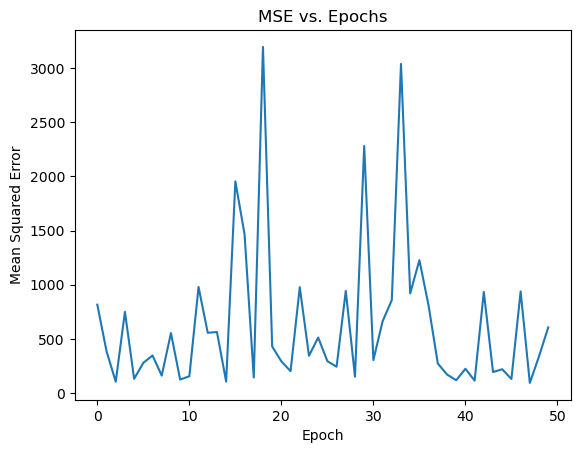

In [65]:
import matplotlib.pyplot as plt
plt.plot(range(50), mse)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Epochs')
plt.show()

In [67]:
mean_mse = np.mean(mse)
std_mse = np.std(mse)

In [68]:
print('Mean MSE: ', mean_mse)
print('Standard Deviation MSE:', std_mse)

Mean MSE:  631.4562743193583
Standard Deviation MSE: 689.2178547774291


In [69]:
# # fit the model
# from keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1,)
# history = model.fit(predictors, target, validation_split=0.3, epochs=50, verbose=2, callbacks=[early_stopping])

In [ ]:
# from keras.callbacks import EarlyStopping, ModelCheckpoint

# # Define EarlyStopping callback
# # early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

# # Define ModelCheckpoint callback to save the best model weights
# model_checkpoint = ModelCheckpoint('best_model_weights.h5', save_best_only=True, save_weights_only=True, monitor='val_loss', mode='min', verbose=1)

# # Create and compile your model
# model = regression_model()  # Replace with your model creation code
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Fit the model with the EarlyStopping and ModelCheckpoint callbacks
# history = model.fit(predictors_norm, target, validation_split=0.3, epochs=100, verbose=2, callbacks=[early_stopping, model_checkpoint])


In [ ]:
# import matplotlib.pyplot as plt

# # Assuming you have already trained your model and obtained the training history
# # The history variable typically contains information about training and validation loss over epochs.

# # Plot training & validation loss values
# training_loss = history.history['loss']
# validation_loss = history.history['val_loss']

# epochs = range(1, len(training_loss) + 1)

# plt.figure(figsize=(10, 6))
# plt.plot(epochs, training_loss, 'b', label='Training Loss')
# plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.grid(True)
# plt.show()

# validation_loss
# training_loss

Feel free to vary the following and note what impact each change has on the model's performance:

1. Increase or decreate number of neurons in hidden layers
2. Add more hidden layers
3. Increase number of epochs


### Thank you for completing this lab!

This notebook was created by [Alex Aklson](https://www.linkedin.com/in/aklson/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0101ENSkillsNetwork945-2022-01-01). I hope you found this lab interesting and educational. Feel free to contact me if you have any questions!



## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-09-21  | 2.0  | Srishti  |  Migrated Lab to Markdown and added to course repo in GitLab |



<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>


This notebook is part of a course on **Coursera** called *Introduction to Deep Learning & Neural Networks with Keras*. If you accessed this notebook outside the course, you can take this course online by clicking [here](https://cocl.us/DL0101EN_Coursera_Week3_LAB1).


<hr>

Copyright &copy; 2019 [IBM Developer Skills Network](https://cognitiveclass.ai/?utm_medium=dswb&utm_source=bducopyrightlink&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0101ENSkillsNetwork945-2022-01-01&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0101ENSkillsNetwork945-2022-01-01).
